In [3]:
library(dplyr)
library(ggplot2)
library(grid)
library(gridExtra)
library(reshape2)

df.train = tbl_df(read.csv("../../data/train.csv", stringsAsFactors = FALSE))
df.test = tbl_df(read.csv("../../data/test.csv", stringsAsFactors = FALSE))
df.combined = rbind(within(df.train, rm('Id','SalePrice')), within(df.test, rm('Id')))


In [98]:
# XXX
get_slim_df = function (fat_df, factor_column) {
    fat_df %>% 
        filter(!is.na(LotFrontage)) %>%
        rename_(Factor=factor_column) %>% 
        select(LotFrontage, Factor) %>% 
        filter(!is.na(Factor)) %>%
        mutate(FactorIsNotZero=(Factor != 0))
}

# XXX
get_nonzero_factor_df = function (slim_fd) {
    slim_fd %>% 
        filter(Factor > 0) %>% 
        mutate(FactorSqrt=Factor^0.5, FactorLog=log10(Factor))
}

# XXX
expore_zero_vs_nonzero = function (slim_fd) {
    
    df2 = slim_fd %>% 
            group_by(FactorIsNotZero) %>% 
            summarise(n(), meanLotFrontage=mean(LotFrontage))
    model.lm <- lm(LotFrontage ~ FactorIsNotZero, data = slim_fd)
    
    print(df2)
    print(summary(model.lm))
}

# XXX
visualize_zero_vs_nonzero = function (slim_fd, binwidth) {
        
    g1 = ggplot(slim_fd , aes(LotFrontage, fill=FactorIsNotZero)) + 
            geom_histogram(binwidth = binwidth) +  
            theme(legend.position="top")
    g2 = ggplot(slim_df, aes(x=FactorIsNotZero, y=LotFrontage)) + 
            geom_jitter(width=0.1)
    
    arrangeGrob(g1, g2, layout_matrix=rbind(c(1, 2)))
}

# XXX
explore_nonzero = function (slim_fd, x_factor) {
    nonzero_df = get_nonzero_factor_df(slim_fd)
    formula_str = paste("LotFrontage ~ ", x_factor)
    model.lm <- lm(as.formula(formula_str), data = nonzero_df)
    print(summary(model.lm))
}

# XXX
visualize_nonzero = function (nonzero_data_frame, binwidth) {
    
    g1 = ggplot(nonzero_data_frame, aes(Factor)) + geom_histogram(binwidth = binwidth[1])
    g2 = ggplot(nonzero_data_frame, aes(FactorSqrt)) + geom_histogram(binwidth = binwidth[2])
    g3 = ggplot(nonzero_data_frame, aes(FactorLog)) + geom_histogram(binwidth = binwidth[3])

    q1 = ggplot(nonzero_data_frame, aes(sample=Factor)) + stat_qq()
    q2 = ggplot(nonzero_data_frame, aes(sample=FactorSqrt)) + stat_qq()
    q3 = ggplot(nonzero_data_frame, aes(sample=FactorLog)) + stat_qq()

    s1 = ggplot(nonzero_data_frame, aes(x=Factor, y=LotFrontage)) + 
            geom_point(shape=1) + 
            stat_smooth(method="lm", se=FALSE)
    s2 = ggplot(nonzero_data_frame, aes(x=FactorSqrt, y=LotFrontage)) + 
            geom_point(shape=1) + 
            stat_smooth(method="lm", se=FALSE)
    s3 = ggplot(nonzero_data_frame, aes(x=FactorLog, y=LotFrontage)) + 
            geom_point(shape=1) + 
            stat_smooth(method="lm", se=FALSE)

    arrangeGrob(g1, g2, g3, 
                 q1, q2, q3,
                 s1, s2, s3, 
                 layout_matrix=rbind(c(1, 2, 3), 
                                     c(4, 5, 6),
                                     c(7, 8, 9)))
}

# %
# ScreenPorch
# %

# A tibble: 2 x 3
  FactorIsNotZero `n()` meanLotFrontage
            <lgl> <int>           <dbl>
1           FALSE  2220        68.76126
2            TRUE   213        74.98122

Call:
lm(formula = LotFrontage ~ FactorIsNotZero, data = slim_fd)

Residuals:
    Min      1Q  Median      3Q     Max 
-47.761 -11.761  -0.761  11.239 244.239 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          68.7613     0.4942 139.147   <2e-16 ***
FactorIsNotZeroTRUE   6.2200     1.6701   3.724    2e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.28 on 2431 degrees of freedom
Multiple R-squared:  0.005673,	Adjusted R-squared:  0.005264 
F-statistic: 13.87 on 1 and 2431 DF,  p-value: 0.0002004


Call:
lm(formula = LotFrontage ~ FactorLog, data = nonzero_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.150 -14.882   0.118   9.883  75.110 

Coefficients:
            Estimate Std. Error t value Pr(>

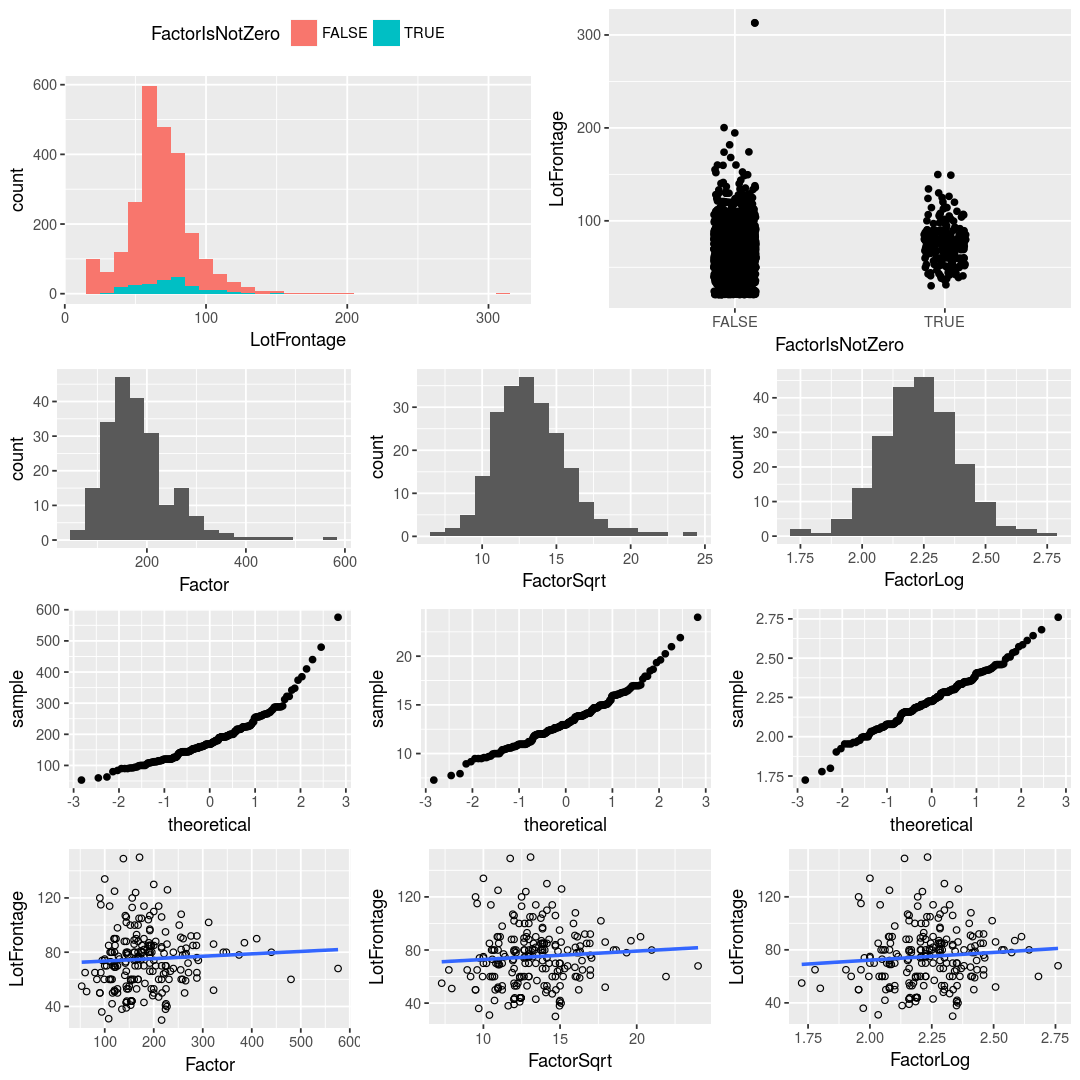

In [120]:
slim_df = get_slim_df(df.combined, 'ScreenPorch')
nonzero_df = get_nonzero_factor_df(slim_df)

expore_zero_vs_nonzero(slim_df)
model.lm <- lm(LotFrontage ~ FactorLog, data = nonzero_df)
print(summary(model.lm))

x = visualize_zero_vs_nonzero(slim_df, binwidth=10)
y = visualize_nonzero(nonzero_df, c(30, 1, 1/12))

options(repr.plot.width = 9, repr.plot.height = 9)
grid.arrange(x, y, layout_matrix = rbind(c(1), c(2), c(2)))

# %
# EnclosedPorch
# %

# A tibble: 2 x 3
  FactorIsNotZero `n()` meanLotFrontage
            <lgl> <int>           <dbl>
1           FALSE  2034        69.83874
2            TRUE   399        66.58897

Call:
lm(formula = LotFrontage ~ FactorIsNotZero, data = slim_fd)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.839 -10.839  -1.589  10.161 243.161 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)           69.839      0.517 135.073   <2e-16 ***
FactorIsNotZeroTRUE   -3.250      1.277  -2.545    0.011 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.32 on 2431 degrees of freedom
Multiple R-squared:  0.002658,	Adjusted R-squared:  0.002248 
F-statistic: 6.479 on 1 and 2431 DF,  p-value: 0.01098


Call:
lm(formula = LotFrontage ~ FactorLog, data = nonzero_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.965 -11.379  -4.996   8.549 103.693 

Coefficients:
            Estimate Std. Error t value Pr(>|t

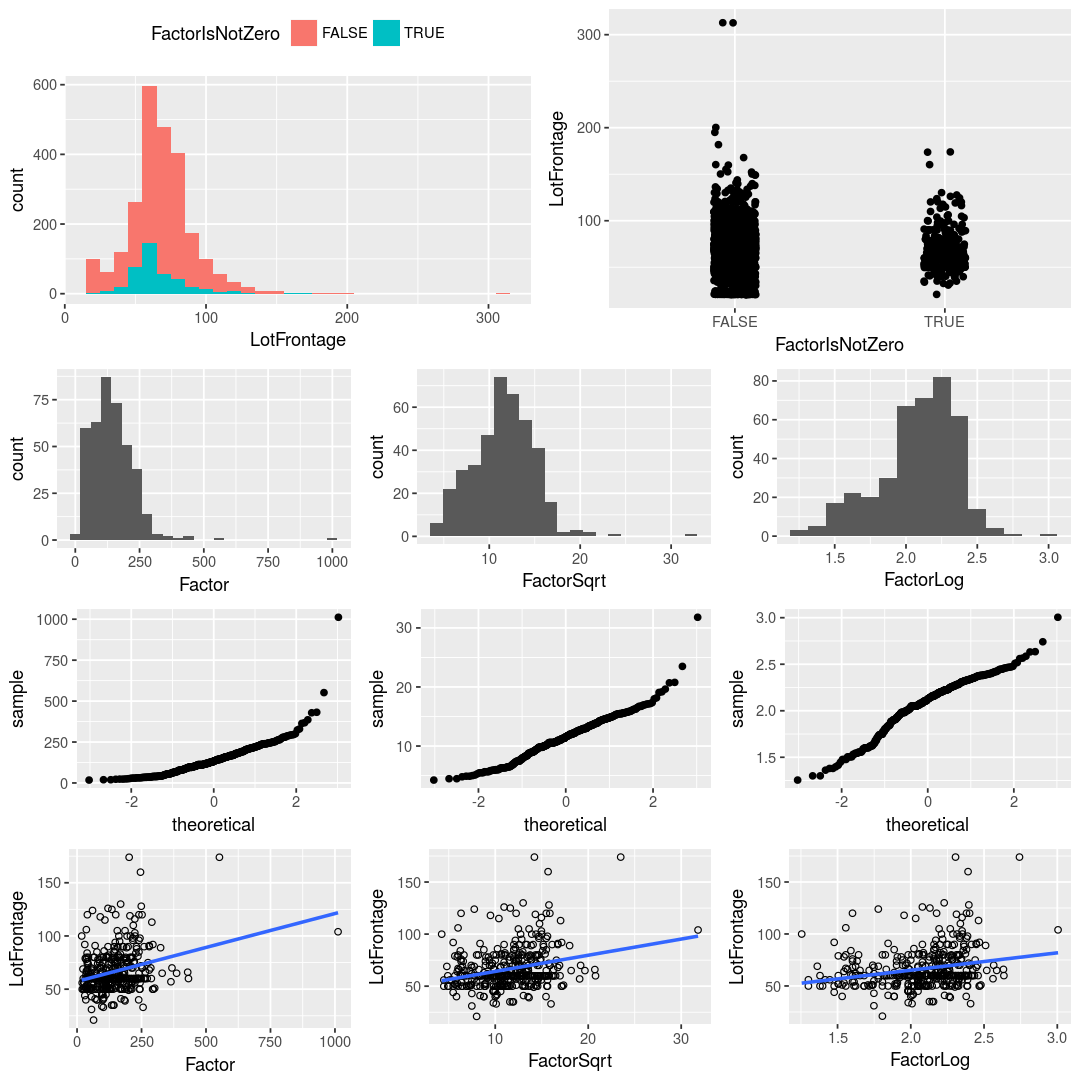

In [123]:
slim_df = get_slim_df(df.combined, 'EnclosedPorch')
nonzero_df = get_nonzero_factor_df(slim_df)

expore_zero_vs_nonzero(slim_df)
model.lm <- lm(LotFrontage ~ FactorLog, data = nonzero_df)
print(summary(model.lm))

x = visualize_zero_vs_nonzero(slim_df, binwidth=10)
y = visualize_nonzero(nonzero_df, c(40, 1.4, 1/8))

options(repr.plot.width = 9, repr.plot.height = 9)
grid.arrange(x, y, layout_matrix = rbind(c(1), c(2), c(2)))

# %
# OpenPorchSF
# %

# A tibble: 2 x 3
  FactorIsNotZero `n()` meanLotFrontage
            <lgl> <int>           <dbl>
1           FALSE  1096        65.95894
2            TRUE  1337        72.04936

Call:
lm(formula = LotFrontage ~ FactorIsNotZero, data = slim_fd)

Residuals:
    Min      1Q  Median      3Q     Max 
-51.049 -12.049  -1.959  11.951 247.041 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          65.9589     0.6993  94.317  < 2e-16 ***
FactorIsNotZeroTRUE   6.0904     0.9434   6.456 1.29e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.15 on 2431 degrees of freedom
Multiple R-squared:  0.01686,	Adjusted R-squared:  0.01645 
F-statistic: 41.68 on 1 and 2431 DF,  p-value: 1.294e-10


Call:
lm(formula = LotFrontage ~ FactorLog, data = nonzero_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.096 -13.525  -0.963  12.191 233.940 

Coefficients:
            Estimate Std. Error t value Pr(>|t

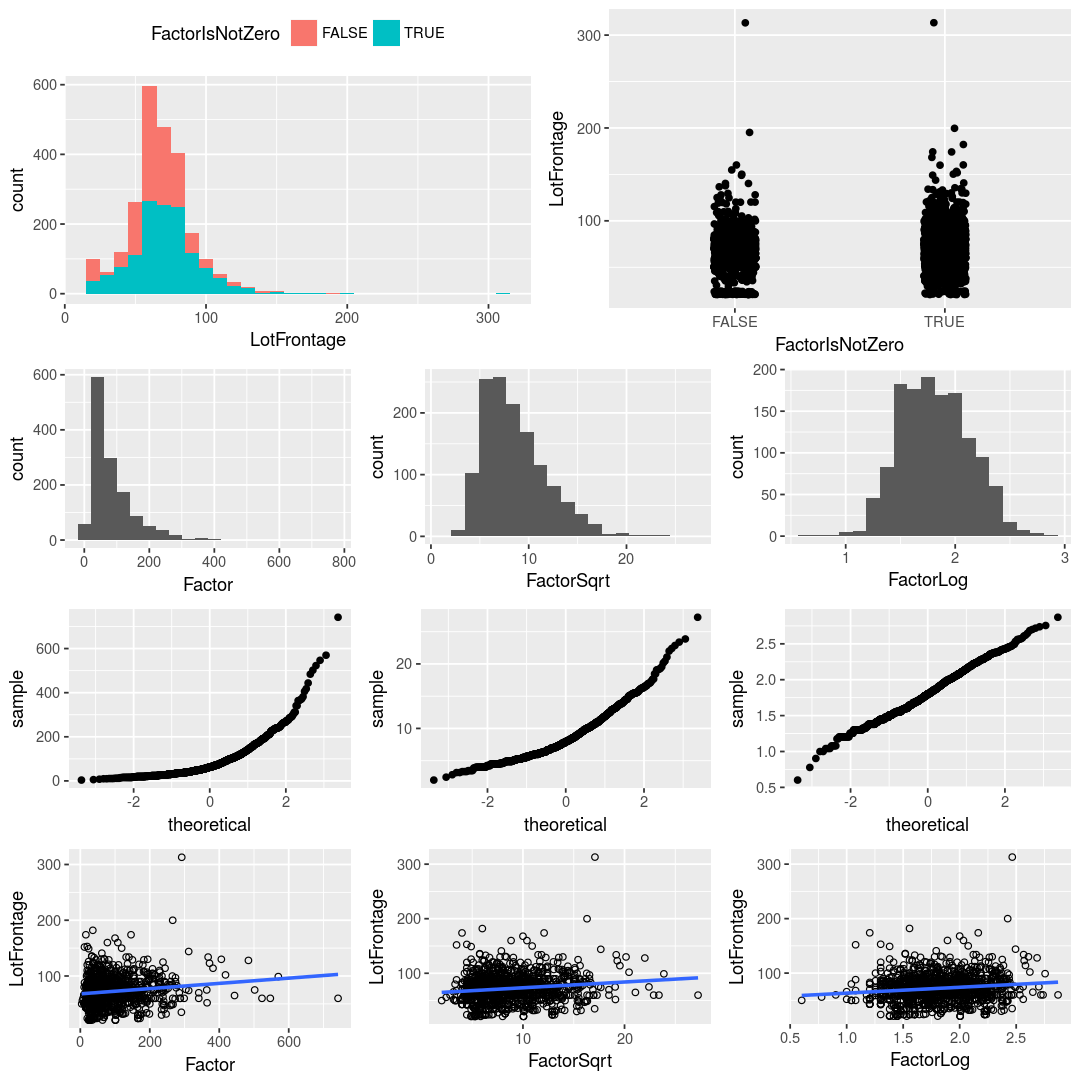

In [124]:
slim_df = get_slim_df(df.combined, 'OpenPorchSF')
nonzero_df = get_nonzero_factor_df(slim_df)

expore_zero_vs_nonzero(slim_df)
model.lm <- lm(LotFrontage ~ FactorLog, data = nonzero_df)
print(summary(model.lm))

x = visualize_zero_vs_nonzero(slim_df, binwidth=10)
y = visualize_nonzero(nonzero_df, c(40, 1.4, 1/8))

options(repr.plot.width = 9, repr.plot.height = 9)
grid.arrange(x, y, layout_matrix = rbind(c(1), c(2), c(2)))

# %
# BsmtFinSF2
# %

# A tibble: 2 x 3
  FactorIsNotZero `n()` meanLotFrontage
            <lgl> <int>           <dbl>
1           FALSE  2157        69.02689
2            TRUE   275        71.38545

Call:
lm(formula = LotFrontage ~ FactorIsNotZero, data = zero_vs_nonzero)

Residuals:
    Min      1Q  Median      3Q     Max 
-50.385 -11.117  -1.385  10.973 243.973 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          69.0269     0.5024 137.385   <2e-16 ***
FactorIsNotZeroTRUE   2.3586     1.4941   1.579    0.115    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.33 on 2430 degrees of freedom
Multiple R-squared:  0.001024,	Adjusted R-squared:  0.0006133 
F-statistic: 2.492 on 1 and 2430 DF,  p-value: 0.1146



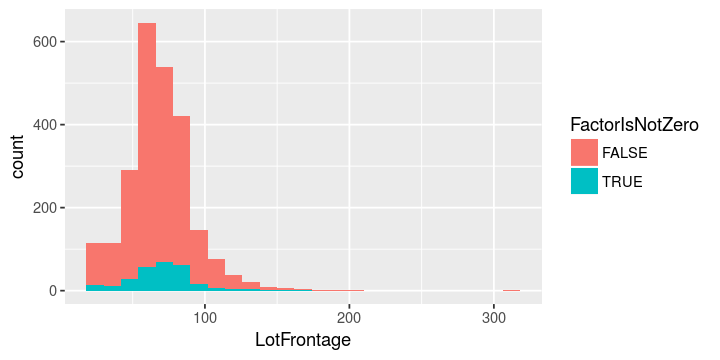

In [4]:
slim_df = get_slim_df(df.combined, 'BsmtFinSF2')
nonzero_df = get_nonzero_factor_df(slim_df)

expore_zero_vs_nonzero(slim_df)
model.lm <- lm(LotFrontage ~ FactorLog, data = nonzero_df)
print(summary(model.lm))

x = visualize_zero_vs_nonzero(slim_df, binwidth=10)
y = visualize_nonzero(nonzero_df, c(40, 1.4, 1/8))

options(repr.plot.width = 9, repr.plot.height = 9)
grid.arrange(x, y, layout_matrix = rbind(c(1), c(2), c(2)))

# %
# WoodDeckSF
# %

In [ ]:
slim_df = get_slim_df(df.combined, 'WoodDeckSF')
nonzero_df = get_nonzero_factor_df(slim_df)

expore_zero_vs_nonzero(slim_df)
model.lm <- lm(LotFrontage ~ FactorLog, data = nonzero_df)
print(summary(model.lm))

x = visualize_zero_vs_nonzero(slim_df, binwidth=10)
y = visualize_nonzero(nonzero_df, c(40, 1.4, 1/8))

options(repr.plot.width = 9, repr.plot.height = 9)
grid.arrange(x, y, layout_matrix = rbind(c(1), c(2), c(2)))

# %
# MasVnrArea
# %

In [ ]:
slim_df = get_slim_df(df.combined, 'MasVnrArea')
nonzero_df = get_nonzero_factor_df(slim_df)

expore_zero_vs_nonzero(slim_df)
model.lm <- lm(LotFrontage ~ FactorLog, data = nonzero_df)
print(summary(model.lm))

x = visualize_zero_vs_nonzero(slim_df, binwidth=10)
y = visualize_nonzero(nonzero_df, c(40, 1.4, 1/8))

options(repr.plot.width = 9, repr.plot.height = 9)
grid.arrange(x, y, layout_matrix = rbind(c(1), c(2), c(2)))

# %
# GarageArea
# %

In [ ]:
slim_df = get_slim_df(df.combined, 'GarageArea')
nonzero_df = get_nonzero_factor_df(slim_df)

expore_zero_vs_nonzero(slim_df)
model.lm <- lm(LotFrontage ~ FactorLog, data = nonzero_df)
print(summary(model.lm))

x = visualize_zero_vs_nonzero(slim_df, binwidth=10)
y = visualize_nonzero(nonzero_df, c(40, 1.4, 1/8))

options(repr.plot.width = 9, repr.plot.height = 9)
grid.arrange(x, y, layout_matrix = rbind(c(1), c(2), c(2)))

# %
# X2ndFlrSF
# %

In [ ]:
slim_df = get_slim_df(df.combined, 'X2ndFlrSF')
nonzero_df = get_nonzero_factor_df(slim_df)

expore_zero_vs_nonzero(slim_df)
model.lm <- lm(LotFrontage ~ FactorLog, data = nonzero_df)
print(summary(model.lm))

x = visualize_zero_vs_nonzero(slim_df, binwidth=10)
y = visualize_nonzero(nonzero_df, c(40, 1.4, 1/8))

options(repr.plot.width = 9, repr.plot.height = 9)
grid.arrange(x, y, layout_matrix = rbind(c(1), c(2), c(2)))

# %
# BsmtFinSF1
# %

In [ ]:
slim_df = get_slim_df(df.combined, 'BsmtFinSF1')
nonzero_df = get_nonzero_factor_df(slim_df)

expore_zero_vs_nonzero(slim_df)
model.lm <- lm(LotFrontage ~ FactorLog, data = nonzero_df)
print(summary(model.lm))

x = visualize_zero_vs_nonzero(slim_df, binwidth=10)
y = visualize_nonzero(nonzero_df, c(40, 1.4, 1/8))

options(repr.plot.width = 9, repr.plot.height = 9)
grid.arrange(x, y, layout_matrix = rbind(c(1), c(2), c(2)))

# %
# TotalBsmtSF
# %

In [ ]:
slim_df = get_slim_df(df.combined, 'TotalBsmtSF')
nonzero_df = get_nonzero_factor_df(slim_df)

expore_zero_vs_nonzero(slim_df)
model.lm <- lm(LotFrontage ~ FactorLog, data = nonzero_df)
print(summary(model.lm))

x = visualize_zero_vs_nonzero(slim_df, binwidth=10)
y = visualize_nonzero(nonzero_df, c(40, 1.4, 1/8))

options(repr.plot.width = 9, repr.plot.height = 9)
grid.arrange(x, y, layout_matrix = rbind(c(1), c(2), c(2)))

# %
# BsmtUnfSF
# %

In [ ]:
slim_df = get_slim_df(df.combined, 'BsmtUnfSF')
nonzero_df = get_nonzero_factor_df(slim_df)

expore_zero_vs_nonzero(slim_df)
model.lm <- lm(LotFrontage ~ FactorLog, data = nonzero_df)
print(summary(model.lm))

x = visualize_zero_vs_nonzero(slim_df, binwidth=10)
y = visualize_nonzero(nonzero_df, c(40, 1.4, 1/8))

options(repr.plot.width = 9, repr.plot.height = 9)
grid.arrange(x, y, layout_matrix = rbind(c(1), c(2), c(2)))